# <center> Проект: Анализ резюме из HeadHunter

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [26]:
hh_data = pd.read_csv('gdrive/MyDrive/Google_colab/hh_database.csv', sep=';')
display(hh_data.shape)

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [27]:
display(hh_data.head())
display(hh_data.tail())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [28]:
display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

5. Выведите основную статистическую информацию о столбцах.

In [29]:
display(hh_data.describe(include=['object']))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

#### 1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…

Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*

In [30]:
def get_education_type(level):
    """Выделение из столбца информации о уровне образования соискателя

    Args:
        level (string): Строка из столбца "Обраазование и ВУЗ", которая содержит информацию об образовнии

    Returns:
        string: Уровень образования соискателя
    """
    
    exclude_list = ['Высшее', 'Среднее', 'Неоконченное высшее', 'Среднее специальное']
    # разбиваю строку на слова по слову 'образование'
    education_list = level.split('образование') # получила список слов в строке и занесла в переменную education_list
    education_type = education_list[0] # при обрезке списка оставила только первую часть
    # проверка того, что полученный элемент, действительно входит в уровни образования
    if education_type == exclude_list:
        education_type = education_list[0] 
    return education_type

# применим функцию к столбцу 'Образование и ВУЗ'
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education_type)
print(hh_data['Образование'])

# проверка полученных категорий
print(hh_data['Образование'].nunique())

# подсчет количества соискателей по уровню образования (задание 3.1)
print(hh_data['Образование'].value_counts())

# удаление старого признака "Образование и ВУЗ"
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)
display(hh_data.head())

0        Неоконченное высшее 
1                     Высшее 
2        Среднее специальное 
3                     Высшее 
4                     Высшее 
                 ...         
44739                 Высшее 
44740                 Высшее 
44741                 Высшее 
44742                 Высшее 
44743                 Высшее 
Name: Образование, Length: 44744, dtype: object
4
Высшее                  33863
Среднее специальное      5765
Неоконченное высшее      4557
Среднее                   559
Name: Образование, dtype: int64


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее


#### 2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*

In [31]:
def get_gender(elem):
    """Функция, получаающая признак пола из столбца таблицы

    Args:
        elem (string): строка, которая содержит информацию о поле и возрасте соискателя

    Returns:
        string: пол (женский или мужской)
    """
        
    # разделим строку по запятой
    gender_list = elem.split(',')
    gender = gender_list[0] # выделим необходимый признак
    if gender == 'Женщина ': #создадим 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина через условие 
        gender = 'Ж'
    else:
        gender = 'М'
    return gender

def get_age(elem):
    """Функция, получающая признак возраста из столбца таблицы

    Args:
        elem (string): строка, которая содержит информацию о поле и возрасте соискателя
        
    Returns:
        string: возраст соискателя
    """
    age_list = elem.split(' ') # разделить строку по пробелам
    age = int(age_list[3]) # выделить необходимый признак в нужном формате (целые числа)
    return age
   
# создали новые столбцы в таблице "Пол" и "Возраст"    
hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_gender)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
# удалили столбец "Пол, возраст"
hh_data = hh_data.drop('Пол, возраст', axis=1)
display(hh_data.head(2))

# подсчет процентов женских резюме (задание 3.2)
print(round(hh_data['Пол'].value_counts(normalize=True)*100, 2))
# подсчет среднего возраста соискателей (задание 3.2)
print(round(hh_data['Возраст'].mean(), 1))


,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60


М    80.93
Ж    19.07
Name: Пол, dtype: float64
32.2


#### 3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [32]:
def get_work_experience(elem):
    """Функция, показывающая опыт работы в месяцах

    Args:
        elem (string): строка, содержащая информацию об опыте работы соискателя

    Returns:
        [int]: суммарный опыт работы в месяцх
    """
    # проверка наличия пропусков, в том числе и скрытых
    if elem == 'Не указано' or elem is np.nan:
        return None
    
    # подсчет суммарного опыта в месяцах
    elem_list = elem.split(' ', maxsplit=6)
    
    years = ['год', 'года', 'лет']
    months = ['месяц', 'месяца', 'месяцев']
    counter = 0
    
    if elem_list[3] in years:
        counter += int(elem_list[2])*12
    if elem_list[3] in months:
        counter += int(elem_list[2])
    elif elem_list[5] in months:
        counter += int(elem_list[4])
    return counter

# создание нового признака и удаление старого признака
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_work_experience)
hh_data = hh_data.drop('Опыт работы', axis=1)
display(hh_data.head())

# расчет медианного опыта работы в месяцах (задание 3.3)
print(hh_data['Опыт работы (месяц)'].median())

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225.0
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0


100.0


#### 4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [33]:
def get_city(elem):
    """Функция, извлекающая город проживания соискателя

    Args:
        elem ([string]): строка, которая содержит информацию о городе проживания соикаателя

    Returns:
        [string]: Строка с одним из 4 значений: Москва, Санкт-Петербург, город миллионник или другие
    """
    
    city = elem.split(' , ')[0]
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь','Воронеж','Волгоград']
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'Город-миллионник'
    else:
        return 'другие'
    
def get_relocations(elem):
    """Функция, извлекающая информацию о готовности к переезду сооискателя

    Args:
        elem ([string]): строка, которая содержит информацию о готовности к переезду соискателя

    Returns:
        [bool]: True - готов переезжать, False - не готов перезжать
    """
    
    if ('не готов к переезду' in elem) or ('не готова к переезду' in elem):
        return False
    elif 'хочу' in elem:
        return True
    else:
        return True
    
def get_bisness_trip(elem):
    """Функция, извлекающая информацию о готовности к командировкам сооискателя

    Args:
        elem ([string]): строка, которая содержит информацию о готовности к командировкам соискателя

    Returns:
        [bool]: True - готов к командировкам, False - не готов к командировкам
    """
    
    if 'командировка' in elem:
        if ('не готов к командировкам' in elem) or ('не готова к командировкам' in elem):
            return False
        else:
            return True
    else:
        return False

# создание новых признаков и удаление старого признака    
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переездам'] = hh_data['Город, переезд, командировки'].apply(get_relocations)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_bisness_trip)
hh_data.drop('Город, переезд, командировки', axis=1, inplace=True)
display(hh_data.head())

# расчет процентов соискателей, живущих в Санкт-Петербурге (задание 3.4)
print(hh_data['Город'].value_counts(normalize=True)*100)

# расчет процентов соискателей, готовых одновременно и к переездам, и к командировкам (задание 3.4)
mask = hh_data['Готовность к переездам'] & hh_data['Готовность к командировкам']
print(f'Доля соискателей готовых к переезду и командировкам составляет {round(hh_data[mask].count()[1]/hh_data.shape[0]*100)}%')



,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переездам,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0,Москва,False,True


Москва              37.146880
другие              35.432684
Город-миллионник    16.386555
Санкт-Петербург     11.033882
Name: Город, dtype: float64
Доля соискателей готовых к переезду и командировкам составляет 32%


#### 5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [34]:
employments = ['частичная занятость', 'полная занятость', 'стажировка', 'проектная работа', 'волонтерство']
schedules = ['гибкий график','полный день','сменный график','вахтовый метод','удаленная работа']

for elem in employments:
    hh_data[elem] = hh_data['Занятость'].apply(lambda x: True if elem in x else False)

for elem in schedules:
    hh_data[elem] = hh_data['График'].apply(lambda x: True if elem in x else False)

hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)

# расчет количества людей, которые ищут проектную работу и волонтёрство (задание 3.5)
print(hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0])  

# расчет количества людей, которые хотят работать вахтовым методом и с гибким графиком (задание 3.5)
print(hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0])

436
2311


#### 6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".

In [ ]:
# извлечение данных по обмену валюты
money_info = pd.read_csv('gdrive/MyDrive/Google_colab/ExchangeRates.csv', sep=',')
# перевод даты в формат datetime в данных money_info
money_info['date'] = pd.to_datetime(money_info['date'])

# Функция, приведения соответствия данных таблицы к наименованию иностранной валюты
def rename_currency(arg):
    """Функция, приведения соответствия данных таблицы к наименованию иностранной валюты

    Args:
        arg ([string]): строка, содержащая наименование валюты в данных

    Returns:
        [string]: наименование валюты в ISO кодировке
    """
    
    # словарь валюты
    currency_dict = {
        'грн.': 'UAH', 'USD': 'USD',
        'EUR': 'EUR', 'бел.руб.': 'BYN',
        'KGS': 'KGS', 'сум': 'UZS',
        'AZN': 'AZN', 'KZT': 'KZT', 'руб.': 'RUB'
    }
    current_currency = arg.split(' ')[0]  # разделение строки по пробелам
    if current_currency in currency_dict: # приведение соответствия валюты в ISO кодировке
        return currency_dict[current_currency]
    

# выделение из столбца желаемaя зп - сумму и валюту
hh_data['Сумма'] = hh_data['ЗП'].apply(lambda x: x.split()[0]).astype(float)
hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: x.split()[1])
hh_data['Валюта'] = hh_data['Валюта'].apply(rename_currency)

# перевод даты в таблице с резюме в формат datetime в данных 
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].apply(lambda x: x.split()[0])
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'])

# объединение двух таблиц методом .merge()
hh_data_merged = hh_data.merge(
    money_info,
    left_on=['Валюта', 'Обновление резюме'],
    right_on=['currency','date'],
    how='left'
)

# заполнение столбца close и proportion значением 1.0 для рубля
mask1 = hh_data_merged['Валюта'] == 'RUB'
hh_data_merged.loc[mask1, 'close'] = 1.0 
hh_data_merged.loc[mask1, 'proportion'] = 1.0   

#Создание нового признакаа и удаление ненужных признаков
hh_data_merged['ЗП (руб)'] = hh_data_merged['close']*hh_data['Сумма']/hh_data_merged['proportion']
hh_data = hh_data_merged.drop(['ЗП', 'Сумма','Валюта','currency','per','date','time','close','vol','proportion'], axis=1)

# подсчет желаемой медианной заработной платы соискателей (задание 3.6)
print(hh_data['ЗП (руб)'].median()/1000)


### Сверка результатов

In [36]:
display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  int64         
 8   Опыт работы (месяц)              44574 non-null  float64       
 9   Город                            44744 non-null  object        
 10  Готовность к переездам           44744 non-null  bool     

None

# Исследование зависимостей в данных

#### 1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [37]:
fig = px.histogram(
    data_frame = hh_data,
    x='Возраст',
    title='Распределение возраста соискателей',
    width=500, 
    histnorm='percent',
    marginal='box',
)

fig.show()

##### Выводы:
- распределение похоже на нормальное, с небольшим отклонением в правую сторону;
- мода распределения возраста сосикателей равна 30 годам;
- предельные значения распределения следующие: минимальный возраст - 14 лет, максимальный - 100 лет;
- возраст большинства соискателей лежит в интервале 27-36 лет;
- по графику видны значения, которые являются аномалиями, это возраст соискателя - 100 лет, людей в принципе мало, кто доживает до 100 лет, не говоря о том, что такой соискатель - трудоспособен, можно отметить еще возраст старше 75 в качестве аномалий, в большинстве случаев люди такого преклонного возраста уже очень зависимы от других (детей, внуков), наблюдаются нарушения физической, психической активности. Возраст 14 лет - можно двояко рассматривать, в этом возрасте работать по трудовому законодательству можно только с разрешения родителей, опекунов.

#### 2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [42]:
fig = px.histogram(
    data_frame=hh_data,
    x='Опыт работы (месяц)',
    title='Распределениие опыта работы в месяцах',
    width=650,
    histnorm='percent',
    marginal='box'
)

fig.show()

##### Выводы:
- мода распределения опыта работы соискателей равна 80-84 месяцев (или иначе 6 лет 8 мес - 7 лет),что в принципе кореллируется с модальный значением возраста соискателя - 30 лет, после окончания ВУЗа в возрасте 23 лет + 7 лет опыта работы = 30 лет соискателя;
- минимальное значение признака - 0 мес., максимальное - 1188 мес.;
- опыт работы большинства соискателей находится в интервале 57-154 мес (в годах это примерно от 5 лет до 13 лет), также кореллируется с возрастом большинства соискателей 
- однозначные аномалии это значение 1188 мес. (99 лет) - это просто фантастика, соискателю тогда должно быть примерно 123 года, таких долгожителей очень мало на планете

#### 3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [39]:
fig = px.histogram(
    data_frame=hh_data,
    x='ЗП (руб)',
    title='Распределениие желаемой зарплаты',
    width=10000,
    histnorm='percent',
    marginal='box'
)

fig.show()

##### Выводы:
- Мода желаемой заработной платы равна 50 тыс. руб.
- Минимальнаяя и максимальная ЗП составляют соответсвенно 1 руб и 24,3 млн руб.
- Желаемая ЗП большинства соискателей составляет в пределах 40-100 тыс руб (интервалы межквартильных размахоав).
- Аномальные значения, полагаю можно принять ЗП выше 1 млн руб, кажется что HeadHunter не рассчитан для вакансий и категории людей, у которых ЗП выше 1 млн

#### 4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [41]:
bar_data = hh_data[hh_data['ЗП (руб)']<1e6].groupby('Образование', as_index=False).median()
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title='Зависимость медианной з/п от уровня образования'
);

fig.show()

##### Выводы:
- Для высшего образования характерны наибольшие уровни желаемой з/п (60 тыс. руб.), видимо в связи получением узкоспецических навыков, необходимых рынку;
- Наименьшие уровни желаемой з/п (40 тыс. руб.) у соискателей с средним и средним специальным образованием;
- Представленный график демонстрирует что, чем выше уровень образования, чем больше времени потратил на обучение, получение профессиональных навыков, тем выше будет з/п у соискателя.

#### 5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [43]:
box_data = hh_data[hh_data['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=box_data,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение з/п от города'
);

fig.show()

Output hidden; open in https://colab.research.google.com to view.

##### Выводы:
- Максимальный медианный уровень з/п наблюдается в Москве и составляет 85 тыс. руб., затем идет САнкт_петербург - 60 тыс рубю, и по 40 тыс в городах-миллиониках и других.
- Наибольший размах медианной з/п в Москве
- Максимальная з/п была выявлена в категории других городов
- Признак города важен при прогнозировании з/п. Москва, как известно, отдельная страна в стране, это один из самых густнонаселенных городов, в нем проживают более 20 млн человек, там уровень з/п на порядок выше чем во всей стране.


#### 6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [44]:
bar_data1 = hh_data.groupby(
    ['Готовность к переездам','Готовность к командировкам'],
    as_index=False)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data1,
    x='ЗП (руб)',
    y='Готовность к переездам',
    color='Готовность к командировкам',
    orientation='h',
    barmode='group',
    title='Зависимость медианной з/п от готовности к переезду и/или командировкам'
)

fig.show()

##### Выводы:
- Максимальная медианная з/п будет у соискателей, которые готовы и к переезду, и к командировкам, она составляет почти 66 тыс.руб.
- У соискателей которые которые готовы только к переезду, но не к командировкам, медианная з/п меньше на 16 тыс. руб. по сравнению с максимальной медианной з/п.
- В то же время, соискатели готовые к командировкам, но не к переезду, будут получать 60 тыс.руб.
- Минимальная медианная з/п у соискателей, которые не готовы к переезду и к коаманадировкам, они будут получать всего лишь 40 тыс.руб.
- Медианная з/п будет выше у соискателей готовых к командировкам, так как у них будет расширенный функционал должностных обязанностей, по сравнению с теми, кто не готов к командировкам.

#### 7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [45]:
pivot = hh_data.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc='median'
)
display(pivot)
fig = px.imshow(
    pivot,
    color_continuous_scale='blues',
    aspect='auto', 
    title='Зависимость медианной з/п от возраста и образования'    
);

fig.show()

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
Высшее,60000.0,NaN,122582.49,90075.5,30000.0,30000.0,30000.0,35000.0,40000.0,45000.0,...,70000.0,79000.0,112500.0,80000.0,75000.0,75000.0,62500.0,45000.0,90000.0,NaN
Неоконченное высшее,NaN,NaN,NaN,80000.0,25000.0,30000.0,31000.0,35000.0,40000.0,40000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Среднее,NaN,10000.0,NaN,44000.0,35000.0,45000.0,29000.0,40000.0,40000.0,35000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Среднее специальное,NaN,2000.0,30000.00,25000.0,25151.0,30000.0,30000.0,30000.0,30000.0,35000.0,...,120000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.0


##### Выводы:
- На тепловой карте увидели новые аномалии, помимо которых описывали в пунктах 1 и 2, это наличие высшего образования у соискателей возрастом до 17 лет и их желаемой з/п в 90- 120 тыс. руб., также з/п = 120 тыс руб у 67-летнего соискателя со среднеспециальным образованием (рост з/п у такого уровня образования очень маленький)
- Можно отметить равномерный, постепенный рост желаемой медианной з/п по мере увеличения возраста соискателей, можно предположить в силу большого опыта работы.
- Максимальные медианные з/п встречаются у соискателей с высшим образованием, минимальные - у соискателей со среднеспециальным образованием.


#### 8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Text(0.5, 1.0, 'Зависимость опыта работы от возраста соискателей')

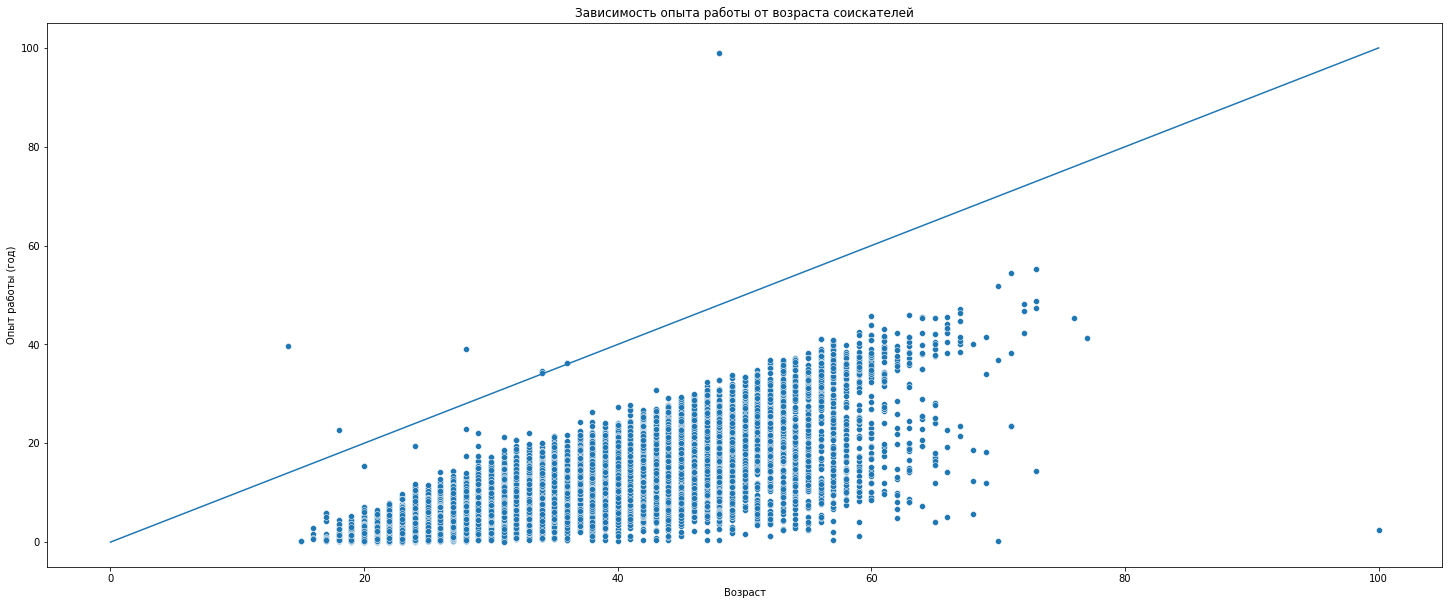

In [46]:
fig = plt.figure(figsize=(25, 10))
scatter_data = hh_data.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12
sns.lineplot(x=[0,100], y=[0,100])
scatter_plot = sns.scatterplot(
    data=scatter_data,
    x='Возраст',
    y='Опыт работы (год)'
);
scatter_plot.set_title('Зависимость опыта работы от возраста соискателей')

##### Выводы:
- На диаграмме рассеяния мы видим выбросы (7 шт), которые находятся на  прямой линии либо выше нее.
- Опыт работы у 100-летнего - 2,5 года - тоже скорее всего маловероятно, этот показатель также будет выбросом.
-  Есть еще некоторые показатели (примерно 3 шт), которые вызывают сомнения: у 20-летних соискателей опыт работы около или больше 10 лет (это сколько лет им было когда они начали работать?)


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".

# Очистка данных

### 1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [47]:
print(hh_data.shape[0])
dupl_columns = list(hh_data.columns)
mask = hh_data.duplicated(subset=dupl_columns)
hh_duplicates = hh_data[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')
hh_data_dedupped = hh_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_data_dedupped.shape[0]}')

44744
Число найденных дубликатов: 161
Результирующее число записей: 44583


### 2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [48]:
null_hh_data = hh_data_dedupped.isnull().sum()
display(null_hh_data)

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переездам               0
Готовность к командировкам           0
частичная занятость                  0
полная занятость                     0
стажировка                           0
проектная работа                     0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
ЗП (руб)                             0
dtype: int64

### 3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [49]:
drop_hh_data = hh_data_dedupped.copy()
drop_hh_data = drop_hh_data.dropna(subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'])
drop_hh_data['Опыт работы (месяц)'] = drop_hh_data['Опыт работы (месяц)'].fillna(drop_hh_data['Опыт работы (месяц)'].median())
# задание 5.3 - результирующее среднее значение в столбце «Опыт работы (месяц)»
print(round(drop_hh_data['Опыт работы (месяц)'].mean()))

114


### 4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [50]:
mask2 = (drop_hh_data['ЗП (руб)'] > 1e6) | (drop_hh_data['ЗП (руб)']  < 1e3)
print(drop_hh_data[mask2]['ЗП (руб)'].count())
drop_hh_data = drop_hh_data.drop(index=drop_hh_data[mask2].index, axis=0)

89


### 5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных

In [51]:
mask3 = drop_hh_data['Опыт работы (месяц)']/12 > drop_hh_data['Возраст']
print(drop_hh_data[mask3].shape[0])
drop_hh_data = drop_hh_data.drop(index=drop_hh_data[mask3].index, axis=0)

7


In [52]:
display(drop_hh_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44485 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44485 non-null  object        
 1   Последнее/нынешнее место работы  44485 non-null  object        
 2   Последняя/нынешняя должность     44485 non-null  object        
 3   Обновление резюме                44485 non-null  datetime64[ns]
 4   Авто                             44485 non-null  object        
 5   Образование                      44485 non-null  object        
 6   Пол                              44485 non-null  object        
 7   Возраст                          44485 non-null  int64         
 8   Опыт работы (месяц)              44485 non-null  float64       
 9   Город                            44485 non-null  object        
 10  Готовность к переездам           44485 non-null  bool     

None

### 6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

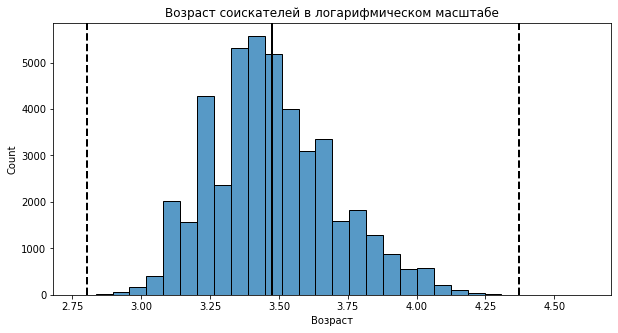

In [53]:
fig, axes = plt.subplots(1,1,figsize=(10,5))

#гистограмма в логарифмическом масштабе
log_age = np.log(drop_hh_data['Возраст']+1)
histplot = sns.histplot(log_age, bins=30, ax=axes)
histplot.set_title('Возраст соискателей в логарифмическом масштабе')

histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), ls='--', color='k', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), ls='--', color='k', lw=2)

In [ ]:
def outliers_z_score(data, feature, left=3, right=4, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x=data[feature]
    mu = x.mean()
    sigma = x.std()
    
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(drop_hh_data, 'Возраст', left=3, right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482
